In [ ]:
!pip install -q imbalanced-learn


Distribution before SMOTE: Counter({np.int64(0): 250, np.int64(6): 250, np.int64(1): 200, np.int64(2): 200, np.int64(4): 200, np.int64(5): 150, np.int64(3): 150})


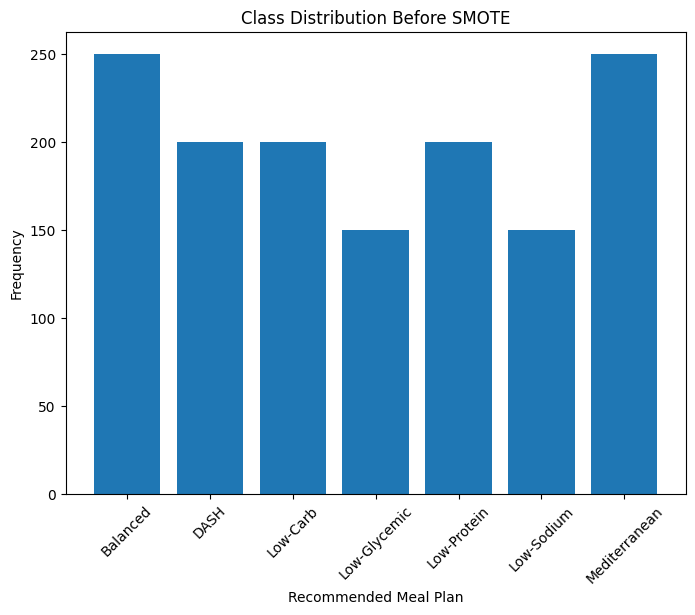

✅ Distribución balanceada: Counter({np.int64(0): 250, np.int64(1): 250, np.int64(2): 250, np.int64(4): 250, np.int64(5): 250, np.int64(3): 250, np.int64(6): 250})


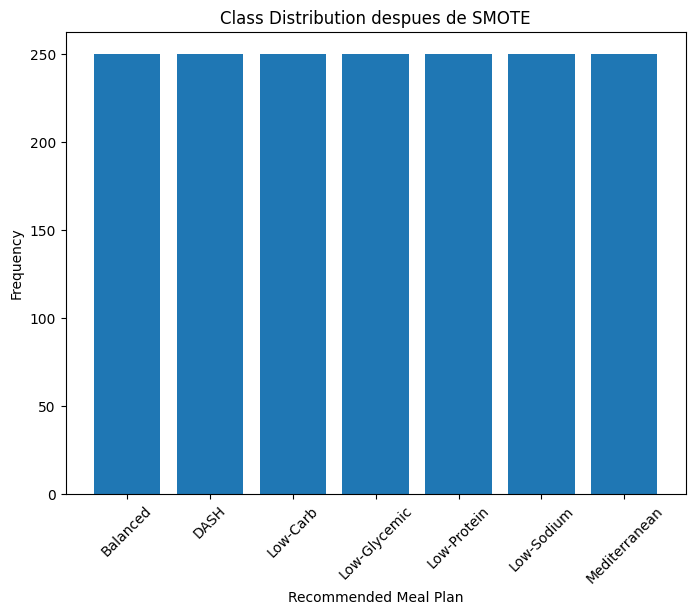

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# ============================
# 1. Cargar datos
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")

# Codificar la variable objetivo
le_target = LabelEncoder()
y = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])
joblib.dump(le_target, "label_encoder_target.pkl")

X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# Distribución antes de SMOTE
print("Distribution before SMOTE:", Counter(y))
plt.figure(figsize=(8, 6))
plt.bar(Counter(y).keys(), Counter(y).values())
plt.xticks(ticks=range(len(le_target.classes_)), labels=le_target.classes_, rotation=45)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Recommended Meal Plan')
plt.ylabel('Frequency')
plt.show()

# ============================
# 2. Balanceo con SMOTE
# ============================
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)


# Distribución después de SMOTE
print("✅ Distribución balanceada:", Counter(y_bal))
plt.figure(figsize=(8, 6))
plt.bar(Counter(y_bal).keys(), Counter(y_bal).values())
plt.xticks(ticks=range(len(le_target.classes_)), labels=le_target.classes_, rotation=45)
plt.title('Class Distribution despues de SMOTE')
plt.xlabel('Recommended Meal Plan')
plt.ylabel('Frequency')
plt.show()

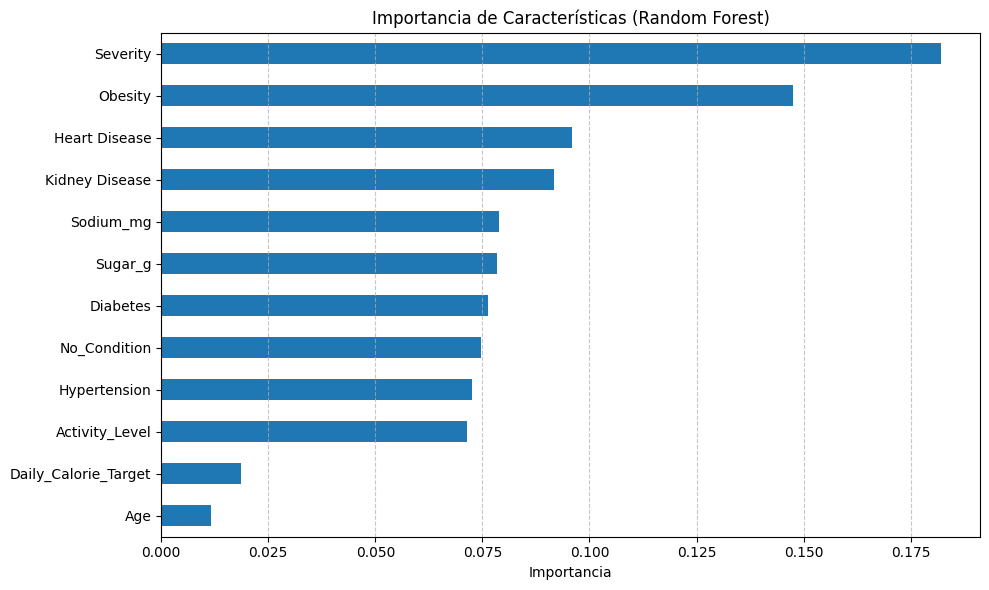

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier


# ============================
# 3. Codificar la variable objetivo
# ============================
le = LabelEncoder()
y = le.fit_transform(df["Recommended_Meal_Plan_Medical"])

# ============================
# 5. Entrenar modelo Random Forest
# ============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# ============================
# 6. Importancia de características
# ============================
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

# ============================
# 7. Visualización del ranking
# ============================
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', title="Importancia de Características (Random Forest)")
plt.xlabel("Importancia")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

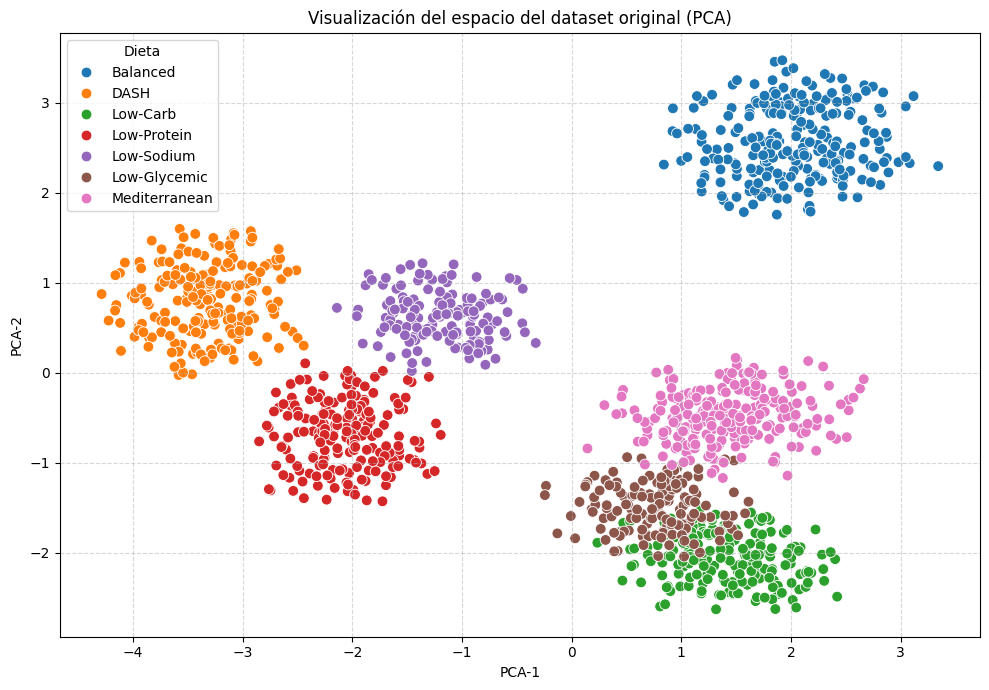

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")

# Codificar columnas categóricas
categorical_cols = df.select_dtypes(include="object").columns.difference(["Recommended_Meal_Plan_Medical"])
df[categorical_cols] = df[categorical_cols].astype("category").apply(lambda x: x.cat.codes)

# Separar características y etiquetas
X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
y = df["Recommended_Meal_Plan_Medical"]

# Escalar los datos
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualización
pca_df = pd.DataFrame(X_pca, columns=["PCA-1", "PCA-2"])
pca_df["Dieta"] = y

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PCA-1", y="PCA-2", hue="Dieta", palette="tab10", s=60)
plt.title("Visualización del espacio del dataset original (PCA)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



✅ Distribución balanceada: Counter({np.int64(0): 250, np.int64(1): 250, np.int64(2): 250, np.int64(4): 250, np.int64(5): 250, np.int64(3): 250, np.int64(6): 250})
Fitting 5 folds for each of 45 candidates, totalling 225 fits
🔍 Decision Tree - Mejor configuración: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
               precision    recall  f1-score   support

     Balanced       1.00      1.00      1.00        50
         DASH       1.00      1.00      1.00        50
     Low-Carb       0.98      0.82      0.89        50
 Low-Glycemic       0.84      0.98      0.91        50
  Low-Protein       1.00      1.00      1.00        50
   Low-Sodium       1.00      1.00      1.00        50
Mediterranean       1.00      1.00      1.00        50

     accuracy                           0.97       350
    macro avg       0.97      0.97      0.97       350
 weighted avg       0.97      0.97      0.97       350



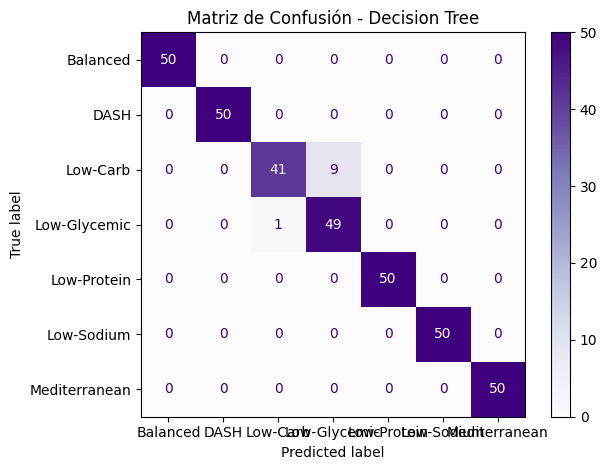

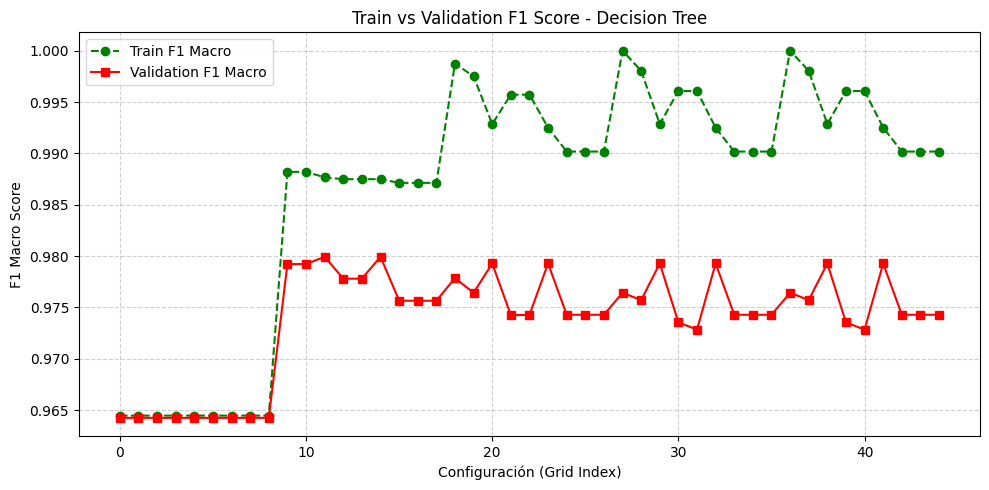

In [12]:
# ============================
# DECISION TREE CON SMOTE Y GRIDSEARCH
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# ============================
# 1. Cargar y preparar datos
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")

# Codificar variable objetivo
le_target = LabelEncoder()
y = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])
joblib.dump(le_target, "label_encoder_target.pkl")

# Codificar variables categóricas y limpiar
X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
categorical_cols = X.select_dtypes(include="object").columns
X[categorical_cols] = OrdinalEncoder().fit_transform(X[categorical_cols])
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# ============================
# 2. Balanceo con SMOTE
# ============================
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)
print("✅ Distribución balanceada:", Counter(y_bal))

# ============================
# 3. Split de entrenamiento
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42
)

# ============================
# 4. Entrenar modelo Decision Tree
# ============================
param_dt = {
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_dt,
    cv=5,
    scoring="f1_macro",
    return_train_score=True,
    n_jobs=-1,
    verbose=1
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
joblib.dump(best_dt, "best_decision_tree_model.pkl")

# ============================
# 5. Evaluación
# ============================
y_pred_dt = best_dt.predict(X_test)
print("🔍 Decision Tree - Mejor configuración:", grid_dt.best_params_)
print(classification_report(y_test, y_pred_dt, target_names=le_target.classes_))

ConfusionMatrixDisplay.from_estimator(
    best_dt, X_test, y_test,
    display_labels=le_target.classes_,
    cmap="Purples"
)
plt.title("Matriz de Confusión - Decision Tree")
plt.tight_layout()
plt.show()

# ============================
# 6. Curva Train vs Validation
# ============================
results_dt = pd.DataFrame(grid_dt.cv_results_)

plt.figure(figsize=(10, 5))
plt.plot(results_dt["mean_train_score"], label="Train F1 Macro", linestyle="--", marker='o', color='green')
plt.plot(results_dt["mean_test_score"], label="Validation F1 Macro", linestyle="-", marker='s', color='red')
plt.xlabel("Configuración (Grid Index)")
plt.ylabel("F1 Macro Score")
plt.title("Train vs Validation F1 Score - Decision Tree")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 108 candidates, totalling 540 fits
🔍 Random Forest - Mejor configuración: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
               precision    recall  f1-score   support

     Balanced       1.00      1.00      1.00        50
         DASH       1.00      1.00      1.00        50
     Low-Carb       0.98      0.84      0.90        50
 Low-Glycemic       0.86      0.98      0.92        50
  Low-Protein       1.00      1.00      1.00        50
   Low-Sodium       1.00      1.00      1.00        50
Mediterranean       1.00      1.00      1.00        50

     accuracy                           0.97       350
    macro avg       0.98      0.97      0.97       350
 weighted avg       0.98      0.97      0.97       350



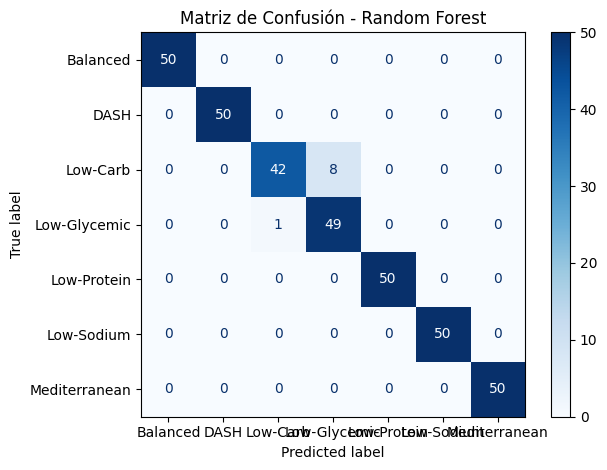

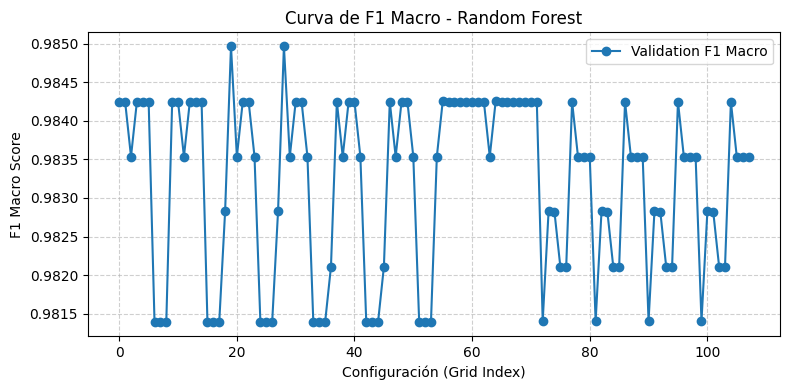

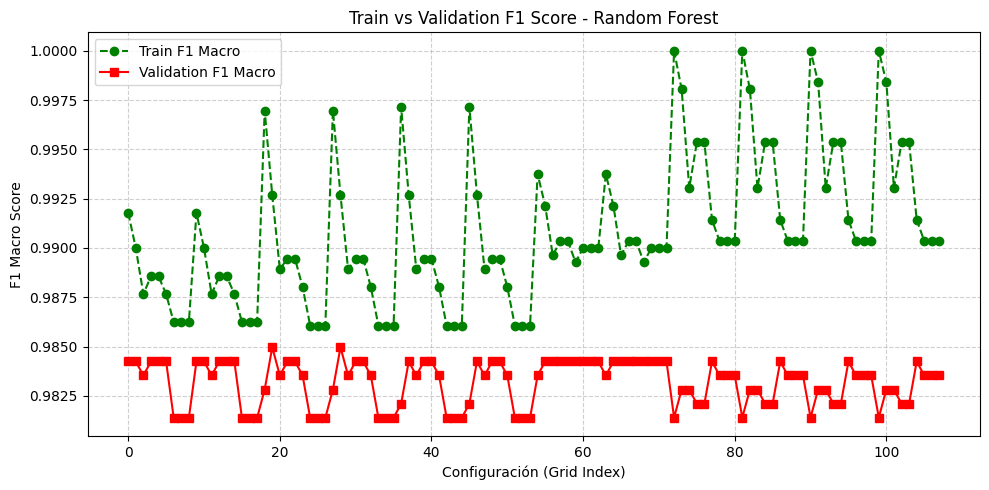

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# ============================
# 1. Cargar y preparar datos
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")

# Codificar variable objetivo
le_target = LabelEncoder()
df["Recommended_Meal_Plan_Medical"] = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])
joblib.dump(le_target, "label_encoder_target.pkl")

# Variables predictoras
X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
y = df["Recommended_Meal_Plan_Medical"]

# Codificar categóricas
categorical_cols = X.select_dtypes(include="object").columns
X[categorical_cols] = OrdinalEncoder().fit_transform(X[categorical_cols])

# Imputar valores faltantes
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# ============================
# 2. División train/test
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42
)


# ============================
# 3. GridSearchCV para Random Forest
# ============================
param_rf = {
    "n_estimators": [100],
    "max_depth": [10, 15, 20],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_rf,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
joblib.dump(best_rf, "best_random_forest_model.pkl")

# ============================
# 4. Predicción y resultados
# ============================
y_pred_rf = best_rf.predict(X_test)

print("🔍 Random Forest - Mejor configuración:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

ConfusionMatrixDisplay.from_estimator(
    best_rf, X_test, y_test,
    display_labels=le_target.classes_,
    cmap="Blues"
)
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()

# ============================
# 5. Curva de Accuracy
# ============================
results_rf = pd.DataFrame(grid_rf.cv_results_)

plt.figure(figsize=(8, 4))
plt.plot(results_rf["mean_test_score"], label="Validation F1 Macro", marker='o')
plt.xlabel("Configuración (Grid Index)")
plt.ylabel("F1 Macro Score")
plt.title("Curva de F1 Macro - Random Forest")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ============================
# 6. Train vs Validation Accuracy
# ============================
plt.figure(figsize=(10, 5))
plt.plot(results_rf["mean_train_score"], label="Train F1 Macro", linestyle="--", marker='o', color='green')
plt.plot(results_rf["mean_test_score"], label="Validation F1 Macro", linestyle="-", marker='s', color='red')
plt.xlabel("Configuración (Grid Index)")
plt.ylabel("F1 Macro Score")
plt.title("Train vs Validation F1 Score - Random Forest")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


✅ Distribución balanceada: Counter({np.int64(0): 250, np.int64(1): 250, np.int64(2): 250, np.int64(4): 250, np.int64(5): 250, np.int64(3): 250, np.int64(6): 250})
Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.1124 - loss: 3.3898 - val_accuracy: 0.1536 - val_loss: 2.1549 - learning_rate: 1.0000e-04
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.1693 - loss: 2.8997 - val_accuracy: 0.2393 - val_loss: 1.9931 - learning_rate: 1.0000e-04
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2294 - loss: 2.5332 - val_accuracy: 0.3893 - val_loss: 1.7995 - learning_rate: 1.0000e-04
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2883 - loss: 2.1043 - val_accuracy: 0.5679 - val_loss: 1.5765 - learning_rate: 1.0000e-04
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4161 - loss: 1.7399 - val_accuracy: 0.6714 - val_loss: 1.3460 - learning_rate: 1.0000e-04
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc

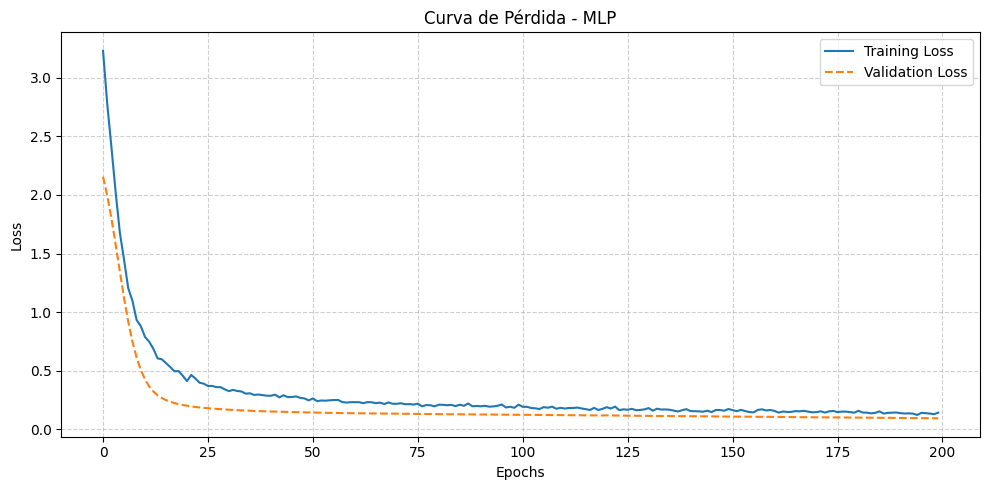

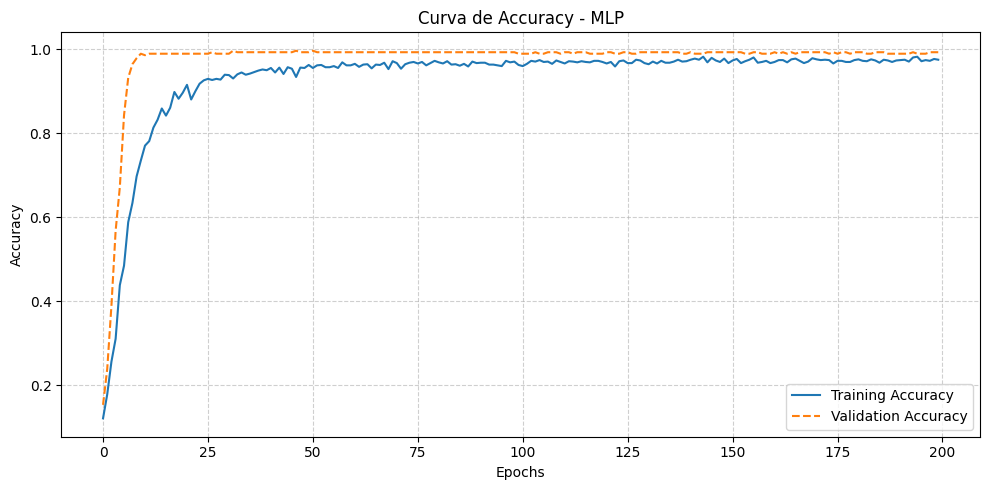

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
🔍 Reporte de Clasificación (MLP):
               precision    recall  f1-score   support

     Balanced       1.00      1.00      1.00        50
         DASH       1.00      1.00      1.00        50
     Low-Carb       0.98      0.84      0.90        50
 Low-Glycemic       0.86      0.98      0.92        50
  Low-Protein       1.00      1.00      1.00        50
   Low-Sodium       1.00      1.00      1.00        50
Mediterranean       1.00      1.00      1.00        50

     accuracy                           0.97       350
    macro avg       0.98      0.97      0.97       350
 weighted avg       0.98      0.97      0.97       350



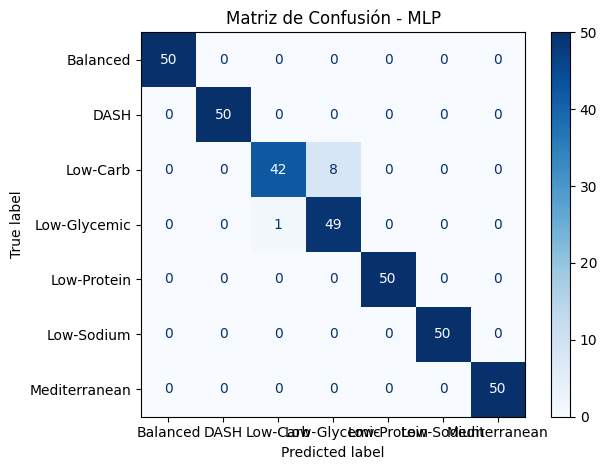

In [ ]:
# ============================
# MLP CON SMOTE Y REGULARIZACIÓN
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, regularizers

# ============================
# 1. Cargar y preparar datos
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Codificar variable objetivo
le_target = LabelEncoder()
y = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])
joblib.dump(le_target, "label_encoder_target.pkl")

X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
categorical_cols = X.select_dtypes(include="object").columns
X[categorical_cols] = OrdinalEncoder().fit_transform(X[categorical_cols])
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# ============================
# 2. Balanceo con SMOTE
# ============================
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
print("✅ Distribución balanceada:", Counter(y_balanced))

# ============================
# 3. División y Escalamiento
# ============================
X_tr, X_test, y_tr, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_tr, y_tr, test_size=0.2, stratify=y_tr, random_state=42
)

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_val = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# ============================
# 4. MODELO MLP REGULARIZADO
# ============================
n_classes = len(np.unique(y_balanced))
model = models.Sequential([
    layers.Input(shape=(X_tr.shape[1],)),
    layers.GaussianNoise(0.1),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(n_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ============================
# 5. CALLBACKS
# ============================
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

# ============================
# 6. Class Weights
# ============================
class_weights = dict(
    zip(
        np.unique(y_tr),
        compute_class_weight('balanced', classes=np.unique(y_tr), y=y_tr)
    )
)

# ============================
# 7. ENTRENAMIENTO
# ============================
history = model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    class_weight=class_weights,
    callbacks=callbacks_list,
    verbose=1
)

# ============================
# 8. CURVAS DE ENTRENAMIENTO
# ============================
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title("Curva de Pérdida - MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title("Curva de Accuracy - MLP")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ============================
# 9. MATRIZ DE CONFUSIÓN
# ============================
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("🔍 Reporte de Clasificación (MLP):")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=le_target.classes_,
    cmap="Blues"
)
plt.title("Matriz de Confusión - MLP")
plt.tight_layout()
plt.show()


✅ Distribución balanceada: Counter({np.int64(0): 250, np.int64(1): 250, np.int64(2): 250, np.int64(4): 250, np.int64(5): 250, np.int64(3): 250, np.int64(6): 250})
🎯 Features seleccionadas: ['Activity_Level', 'Sodium_mg', 'Sugar_g', 'Severity', 'Diabetes', 'Obesity', 'Heart Disease', 'Hypertension', 'Kidney Disease', 'No_Condition']
Fitting 5 folds for each of 12 candidates, totalling 60 fits


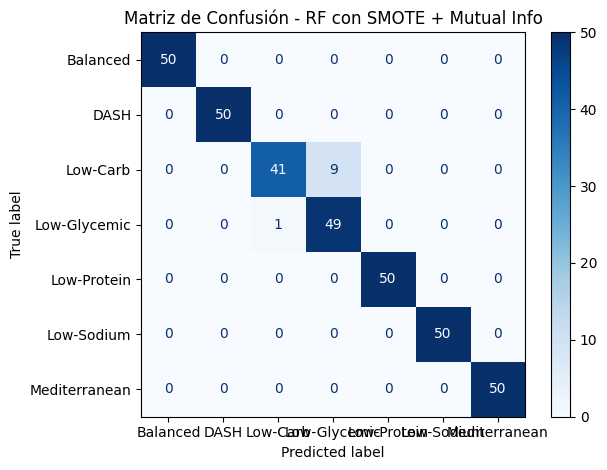

🔍 Mejor configuración: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
               precision    recall  f1-score   support

     Balanced       1.00      1.00      1.00        50
         DASH       1.00      1.00      1.00        50
     Low-Carb       0.98      0.82      0.89        50
 Low-Glycemic       0.84      0.98      0.91        50
  Low-Protein       1.00      1.00      1.00        50
   Low-Sodium       1.00      1.00      1.00        50
Mediterranean       1.00      1.00      1.00        50

     accuracy                           0.97       350
    macro avg       0.97      0.97      0.97       350
 weighted avg       0.97      0.97      0.97       350



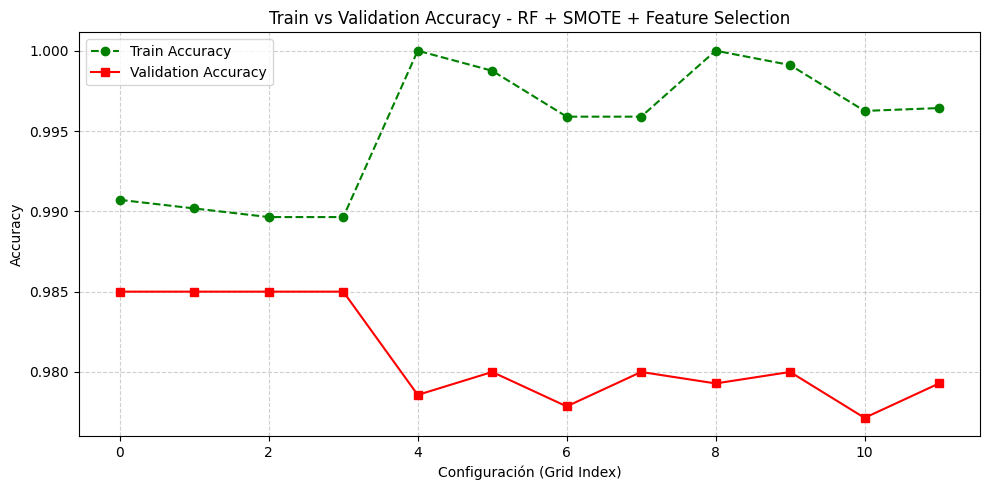

['selected_features_mutual_info.pkl']

In [ ]:
!pip install imbalanced-learn  # Si no lo tienes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# ============================
# 1. Cargar datos
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Codificar la variable objetivo
le_target = LabelEncoder()
y = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])
joblib.dump(le_target, "label_encoder_target.pkl")

X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# ============================
# 2. Balanceo con SMOTE
# ============================
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)
print("✅ Distribución balanceada:", Counter(y_bal))

# ============================
# 3. Feature Selection - Mutual Info
# ============================
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_bal, y_bal)
selected_features = X.columns[selector.get_support()]
print("🎯 Features seleccionadas:", list(selected_features))

# ============================
# 4. Train/Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_bal[selected_features], y_bal, test_size=0.2, stratify=y_bal, random_state=42
)

# ============================
# 5. Entrenar modelo - GridSearchCV
# ============================
param_grid = {
    "n_estimators": [100],
    "max_depth": [10, 15, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"],
    "bootstrap": [False]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

# ============================
# 6. Resultados
# ============================
ConfusionMatrixDisplay.from_estimator(
    best_rf, X_test, y_test, display_labels=le_target.classes_, cmap="Blues"
)
plt.title("Matriz de Confusión - RF con SMOTE + Mutual Info")
plt.tight_layout()
plt.show()

print("🔍 Mejor configuración:", grid.best_params_)
print(classification_report(y_test, y_pred, target_names=le_target.classes_))


# ============================
# 8. Curva Train vs Validation Accuracy
# ============================
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame(grid.cv_results_)

plt.figure(figsize=(10, 5))
plt.plot(results_df["mean_train_score"], label="Train Accuracy", linestyle='--', marker='o', color='green')
plt.plot(results_df["mean_test_score"], label="Validation Accuracy", linestyle='-', marker='s', color='red')
plt.xlabel("Configuración (Grid Index)")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy - RF + SMOTE + Feature Selection")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ============================
# 7. Guardar modelo
# ============================
joblib.dump(best_rf, "rf_mutual_info_model.pkl")
joblib.dump(selected_features.tolist(), "selected_features_mutual_info.pkl")

📊 Distribución de Clases (200 muestras):
                       Clase  Reales  Predichas
Balanced            Balanced      27         27
DASH                    DASH      34         34
Low-Carb            Low-Carb      30         26
Low-Glycemic    Low-Glycemic      27         31
Low-Protein      Low-Protein      30         30
Low-Sodium        Low-Sodium      28         28
Mediterranean  Mediterranean      24         24


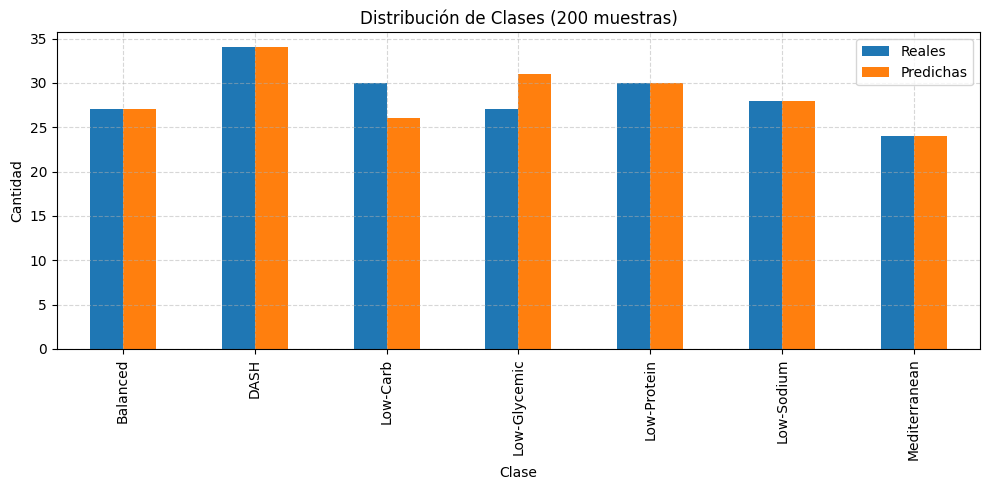

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.over_sampling import SMOTE

# ============================
# 1. Cargar datos y preparar
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Codificar variable objetivo
le_target = LabelEncoder()
y = le_target.fit_transform(df["Recommended_Meal_Plan_Medical"])

X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# Balancear con SMOTE
X_bal, y_bal = SMOTE(random_state=42).fit_resample(X, y)

# Selección de características con Mutual Info
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_bal, y_bal)
selected_features = X.columns[selector.get_support()]

# ============================
# 2. División y Predicción
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X_bal[selected_features], y_bal, test_size=0.2, stratify=y_bal, random_state=42
)

# Usar solo 200 muestras del test
X_sample = X_test[:200]
y_true_sample = y_test[:200]

# Cargar modelo entrenado
modelo = joblib.load("rf_mutual_info_model.pkl")
le_target = joblib.load("label_encoder_target.pkl")  # asegurarte de haberlo guardado antes

# Predicciones
y_pred_sample = modelo.predict(X_sample)

# ============================
# 3. Mostrar distribución
# ============================
pred_labels = le_target.inverse_transform(y_pred_sample)
real_labels = le_target.inverse_transform(y_true_sample)

pred_counts = pd.Series(pred_labels).value_counts().sort_index()
real_counts = pd.Series(real_labels).value_counts().sort_index()

distrib_df = pd.DataFrame({
    "Clase": pred_counts.index,
    "Reales": real_counts,
    "Predichas": pred_counts
}).fillna(0).astype({"Reales": int, "Predichas": int})

print("📊 Distribución de Clases (200 muestras):")
print(distrib_df)

# Visualización
distrib_df.set_index("Clase").plot(kind="bar", figsize=(10, 5), title="Distribución de Clases (200 muestras)")
plt.ylabel("Cantidad")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

📊 Distribución de predicciones (200 pacientes simulados):

Balanced          56
DASH             292
Low-Carb         108
Low-Glycemic     149
Low-Protein      178
Low-Sodium        67
Mediterranean    150
Name: Frecuencia, dtype: int64


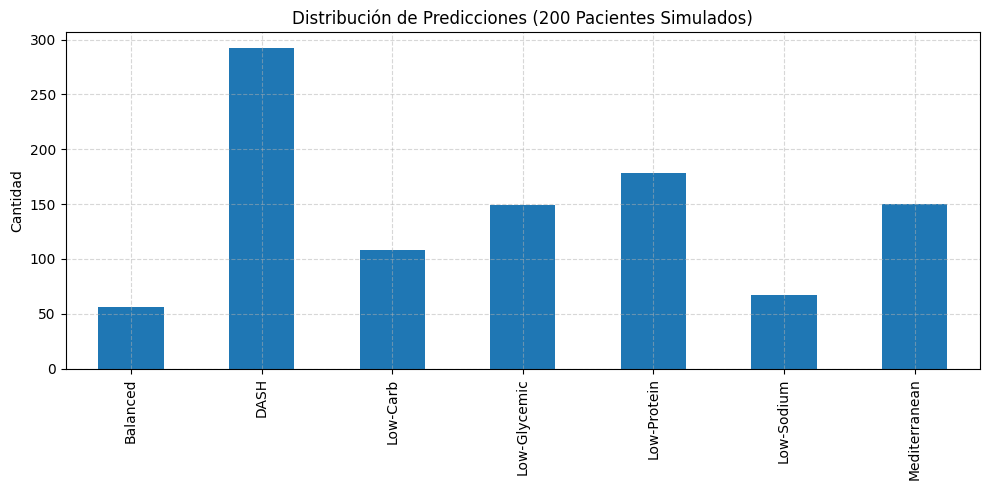

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from collections import Counter

# ============================
# 1. Cargar modelo y columnas
# ============================
model = joblib.load("rf_mutual_info_model.pkl")
selected_features = joblib.load("selected_features_mutual_info.pkl")
label_encoder = joblib.load("label_encoder_target.pkl")

# ============================
# 2. Simulación de pacientes
# ============================

np.random.seed(42)

simulated_data = pd.DataFrame({
    "Activity_Level": np.random.randint(0, 7, 1000),             # valores 0 a 6
    "Sodium_mg": np.random.uniform(500, 2500, 1000),             # sodio normal 500-2500 mg
    "Sugar_g": np.random.uniform(5, 60, 1000),                   # gramos de azúcar diarios
    "Severity": np.random.randint(0, 3, 1000),                   # leve=0, moderada=1, severa=2
    "Diabetes": np.random.randint(0, 2, 1000),
    "Obesity": np.random.randint(0, 2, 1000),
    "Heart Disease": np.random.randint(0, 2, 1000),
    "Hypertension": np.random.randint(0, 2, 1000),
    "Kidney Disease": np.random.randint(0, 2, 1000),
    "No_Condition": 0  # será ajustado más abajo
})

# Asegurar consistencia lógica: si alguna enfermedad está presente, No_Condition = 0
conditions = ["Diabetes", "Obesity", "Heart Disease", "Hypertension", "Kidney Disease"]
simulated_data["No_Condition"] = (
    (simulated_data[conditions].sum(axis=1) == 0).astype(int)
)

# ============================
# 3. Predecir
# ============================
X_simulated = simulated_data[selected_features]
y_pred_simulated = model.predict(X_simulated)
predicted_labels = label_encoder.inverse_transform(y_pred_simulated)

# ============================
# 4. Mostrar distribución
# ============================
pred_df = pd.Series(predicted_labels).value_counts().sort_index()
pred_df.name = "Frecuencia"
print("📊 Distribución de predicciones (200 pacientes simulados):\n")
print(pred_df)

# Visualización
pred_df.plot(kind="bar", figsize=(10, 5), title="Distribución de Predicciones (200 Pacientes Simulados)")
plt.ylabel("Cantidad")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

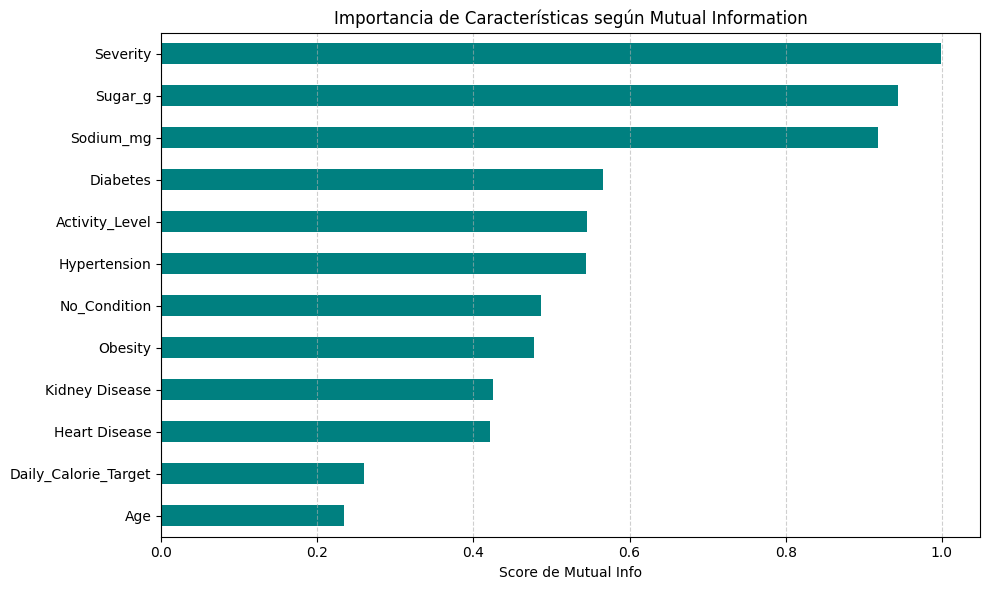


📊 Ranking de características:

Severity                0.9990
Sugar_g                 0.9434
Sodium_mg               0.9179
Diabetes                0.5655
Activity_Level          0.5452
Hypertension            0.5443
No_Condition            0.4862
Obesity                 0.4774
Kidney Disease          0.4247
Heart Disease           0.4207
Daily_Calorie_Target    0.2604
Age                     0.2340
dtype: float64


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer

# ============================
# 1. Cargar dataset
# ============================
df = pd.read_csv("Generated_Medical_Diet_Dataset.csv")

# ============================
# 2. Preprocesamiento
# ============================
X = df.drop(columns=["Recommended_Meal_Plan_Medical"])
y = df["Recommended_Meal_Plan_Medical"]

# Imputar NaNs
X = pd.DataFrame(SimpleImputer(strategy="mean").fit_transform(X), columns=X.columns)

# ============================
# 3. Mutual Information
# ============================
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_selector.fit(X, y)

# Ranking
mi_scores = pd.Series(mi_selector.scores_, index=X.columns).sort_values(ascending=True)

# ============================
# 4. Visualización
# ============================
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='barh', color='teal')
plt.title("Importancia de Características según Mutual Information")
plt.xlabel("Score de Mutual Info")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# (Opcional) Mostrar valores numéricos
print("\n📊 Ranking de características:\n")
print(mi_scores.sort_values(ascending=False).round(4))
